In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [23]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test_x.csv')

print(train.shape)
print(test.shape)

(45532, 78)
(11383, 77)


In [24]:
split_point = train.shape[0]
data = pd.concat([train.drop('voted',axis=1),test],ignore_index=True)
data.shape

(56915, 77)

In [25]:
personal_cols =['age_group','education','engnat','familysize','gender','hand','married','race','religion','urban']
Personal_info = data[personal_cols].copy()

In [26]:
Personal_info.engnat.unique()

array([1, 2, 0], dtype=int64)

In [5]:
(Personal_info.engnat==0).sum()

94

[Text(0, 0, 'YES'), Text(0, 0, 'NO'), Text(0, 0, 'No reply')]

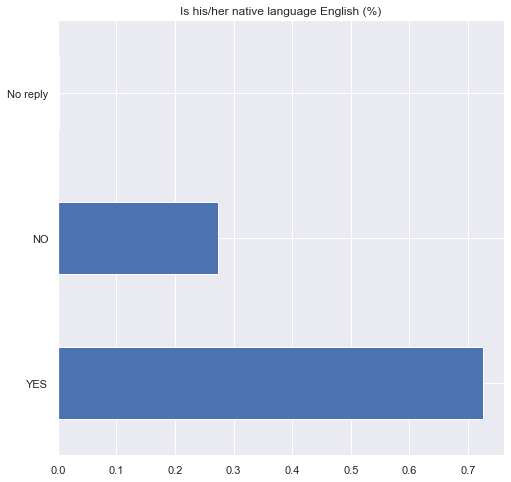

In [8]:
ax2 = Personal_info.engnat.value_counts(normalize=True).plot(kind='barh',
                                                         figsize=(8,8),
                                                         title='Is his/her native language English (%)')
ax2.set_yticklabels(['YES','NO','No reply'])

In [22]:
no_reply=Personal_info[Personal_info['engnat']==0]
no_reply=pd.DataFrame(no_reply)
no_reply=no_reply.drop("engnat", axis=1)
no_reply

,age_group,education,familysize,gender,hand,married,race,religion,urban
281,20s,2,2,Male,1,1,White,Atheist,2
931,40s,4,2,Female,1,1,White,Christian_Protestant,2
967,10s,2,2,Female,1,1,White,Christian_Other,3
1777,20s,2,3,Male,1,2,White,Other,2
1930,30s,4,1,Male,1,1,Asian,Agnostic,3
...,...,...,...,...,...,...,...,...,...
55794,50s,4,5,Female,1,3,Black,Christian_Protestant,3
55920,10s,1,3,Male,1,0,Black,Christian_Other,3
55943,20s,3,2,Female,1,1,Asian,Christian_Protestant,2
56319,50s,2,5,Female,1,2,White,Christian_Other,2


In [7]:
no_reply

,age_group,education,familysize,gender,hand,married,race,religion,urban
281,20s,2,2,Male,1,1,White,Atheist,2
931,40s,4,2,Female,1,1,White,Christian_Protestant,2
967,10s,2,2,Female,1,1,White,Christian_Other,3
1777,20s,2,3,Male,1,2,White,Other,2
1930,30s,4,1,Male,1,1,Asian,Agnostic,3
...,...,...,...,...,...,...,...,...,...
55794,50s,4,5,Female,1,3,Black,Christian_Protestant,3
55920,10s,1,3,Male,1,0,Black,Christian_Other,3
55943,20s,3,2,Female,1,1,Asian,Christian_Protestant,2
56319,50s,2,5,Female,1,2,White,Christian_Other,2


In [36]:
no_reply['index']=Personal_info[Personal_info['engnat']==0].index

In [37]:
reply['index']=Personal_info[Personal_info['engnat']!=0].index

In [38]:
reply

,age_group,education,engnat,familysize,gender,hand,married,race,religion,urban,index
0,30s,2,1,4,Female,1,3,White,Other,1,0
1,20s,4,2,3,Female,1,1,Asian,Hindu,3,1
2,30s,3,1,3,Male,1,2,White,Other,2,2
3,20s,4,2,0,Female,1,1,Asian,Hindu,3,3
4,20s,3,1,2,Male,1,2,White,Agnostic,1,4
...,...,...,...,...,...,...,...,...,...,...,...
56910,20s,3,2,3,Female,1,1,Other,Christian_Catholic,0,56910
56911,10s,2,2,1,Female,1,1,Asian,Agnostic,2,56911
56912,30s,4,1,4,Male,1,2,White,Atheist,1,56912
56913,40s,2,1,3,Female,1,2,White,Atheist,2,56913


In [33]:
idx=list(Personal_info[Personal_info['engnat']==0].index)

In [9]:
reply=Personal_info[Personal_info['engnat']!=0]
reply=pd.DataFrame(reply)
reply_eng=reply.drop("engnat", axis=1)
reply_eng

,age_group,education,familysize,gender,hand,married,race,religion,urban
0,30s,2,4,Female,1,3,White,Other,1
1,20s,4,3,Female,1,1,Asian,Hindu,3
2,30s,3,3,Male,1,2,White,Other,2
3,20s,4,0,Female,1,1,Asian,Hindu,3
4,20s,3,2,Male,1,2,White,Agnostic,1
...,...,...,...,...,...,...,...,...,...
56910,20s,3,3,Female,1,1,Other,Christian_Catholic,0
56911,10s,2,1,Female,1,1,Asian,Agnostic,2
56912,30s,4,4,Male,1,2,White,Atheist,1
56913,40s,2,3,Female,1,2,White,Atheist,2


In [13]:
no_reply=no_reply.reset_index()

In [14]:
no_reply[no_reply['index']==51029]

,level_0,age_group,education,familysize,gender,hand,married,race,religion,urban,index
83,51029,20s,3,2,Female,2,1,White,Other,2,51029


In [15]:
compare=[1,1,1,1,1,2,1,1,1,1,2,1,0,1,1,1,0,0,2,1,1,0,0,1,0,2,0,1,1,1,0,1,2,2,1,1,0,1,0,1,1,2,0,0,2,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,1,1,0,1,2,1,0,1]
for j in range(83,94):
    print(no_reply.iloc[j]["index"])
    cnt1=0
    cnt2=0
    for i in range(56821):  
        cnt=0
        for k in range(9):
            if reply_eng.iloc[i].iloc[k]==no_reply.iloc[j].iloc[k]:
                cnt+=1
        if cnt==9:
            if reply.iloc[i]['engnat']==1:
                cnt1+=1
            else:
                cnt2+=1
            print(cnt1, cnt2, i)
    if cnt1>cnt2:
        compare.append(1)
    elif cnt1<cnt2:
        compare.append(2)
    else:
        compare.append(0)

51029
52472
53127
53756
54667
54708
55794
55920
55943
56319


KeyboardInterrupt: 

In [17]:
compare.append(0)

In [18]:
compare.append(0)

In [27]:
no_reply=Personal_info[Personal_info['engnat']==0]
no_reply=pd.DataFrame(no_reply)

In [28]:
no_reply

,age_group,education,engnat,familysize,gender,hand,married,race,religion,urban
281,20s,2,0,2,Male,1,1,White,Atheist,2
931,40s,4,0,2,Female,1,1,White,Christian_Protestant,2
967,10s,2,0,2,Female,1,1,White,Christian_Other,3
1777,20s,2,0,3,Male,1,2,White,Other,2
1930,30s,4,0,1,Male,1,1,Asian,Agnostic,3
...,...,...,...,...,...,...,...,...,...,...
55794,50s,4,0,5,Female,1,3,Black,Christian_Protestant,3
55920,10s,1,0,3,Male,1,0,Black,Christian_Other,3
55943,20s,3,0,2,Female,1,1,Asian,Christian_Protestant,2
56319,50s,2,0,5,Female,1,2,White,Christian_Other,2


In [34]:
no_reply['engnat']=compare

no_reply

In [45]:
new_data=pd.concat([reply, no_reply])
new_data=new_data.sort_values(by=['index'])
new_data=new_data.drop('index', axis=1)
new_data['engnat'].value_counts()

1    41348
2    15532
0       35
Name: engnat, dtype: int64